# Network vis for news source propagation on Reddit

Use gephi instead! networkx for 1 cluster

In [2]:
!pip install networkx

In [55]:
import networkx as nx
import json
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

**Let's create a graph**

In [56]:
small_graph = nx.Graph()

In [57]:
small_graph.add_nodes_from(["a", "b", "c"])

In [58]:
small_graph.add_edge(*("a", "b"))
small_graph.add_edge(*("b", "c"))

<function matplotlib.pyplot.show(close=None, block=None)>

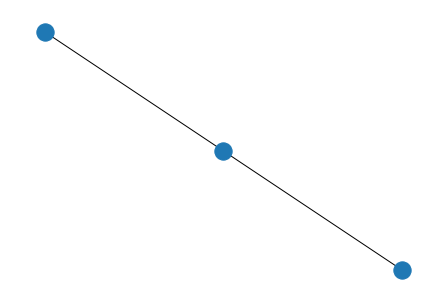

In [59]:
nx.draw(small_graph)
plt.show

In [75]:
# what if we add a node a second time
small_graph.add_nodes_from(["a", "c"])

In [76]:
small_graph.nodes()

NodeView(('a', 'b', 'c'))

Reading files

In [60]:
with open("ns_subreddit_2021-03.json") as infile3:
    ns_subreddit_03 = json.load(infile3)
    
with open("ns_subreddit_2021-04.json") as infile4:
    ns_subreddit_04 = json.load(infile4)

To add edges, then maybe we should look into individual edges.

In [61]:
with open("subreddit_ns_2021-03.json") as infile3a:
    subreddit_ns_03 = json.load(infile3a)
    
with open("subreddit_ns_2021-04.json") as infile4a:
    subreddit_ns_04 = json.load(infile4a)

In [62]:
G = nx.Graph()

In [63]:
print(G.nodes()) # returns a list
print(G.edges()) # returns a list

[]
[]


**let's just use 1000 subreddits with the most subscribers**

In [64]:
subreddits = list(set(subreddit_ns_03.keys()) & set(subreddit_ns_04.keys()))

In [65]:
# Let's only use the subreddits that have lots of subscribers
with open ("subreddit_subscribers.json", "r", encoding = "utf-8") as infile:
    subreddit_subscribers = json.load(infile)

In [66]:
subreddits_w_subc = [subreddits[k] for k in range(len(subreddits)) if subreddits[k] in subreddit_subscribers]
len(subreddits_w_subc)

8865

In [67]:
subreddits_w_subc = [s for s in subreddits_w_subc if subreddit_subscribers[s] is not None]
len(subreddits_w_subc)

8863

In [68]:
srs_all = sorted(subreddits_w_subc, key= lambda x: subreddit_subscribers[x], reverse= True)

(array([8.568e+03, 2.300e+01, 4.000e+00, 1.000e+00, 9.000e+00, 1.400e+01,
        6.000e+00, 6.000e+00, 3.000e+00, 1.000e+00]),
 array([1.00000000e+00, 3.10601750e+06, 6.21203400e+06, 9.31805050e+06,
        1.24240670e+07, 1.55300835e+07, 1.86361000e+07, 2.17421165e+07,
        2.48481330e+07, 2.79541495e+07, 3.10601660e+07]),
 <BarContainer object of 10 artists>)

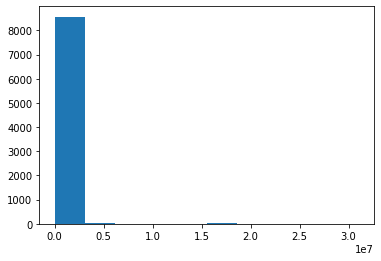

In [69]:
plt.hist([subreddit_subscribers[s] for s in srs_all if subreddit_subscribers[s] > 0])
# could log scale for both x and y

In [70]:
srs_1000 = srs_all[:1000]

In [71]:
srs_1000[:10]

['funny',
 'gaming',
 'aww',
 'pics',
 'science',
 'worldnews',
 'Music',
 'videos',
 'movies',
 'todayilearned']

**now we make graph**

First, we add nodes

In [41]:
news_sources = list(set(ns_subreddit_03.keys()) & set(ns_subreddit_04.keys()))

In [42]:
len(news_sources)

3277

In [43]:
# G.add_nodes_from(news_sources)

In [77]:
subreddit_files = [subreddit_ns_03, subreddit_ns_03]

In [78]:
for sf in subreddit_files:
    for s in sf:
        if s in srs_1000:
            nss = sf[s]
            # we add nodes
            G.add_nodes_from(nss)
            # then we add edges
            # we will discard the counts for now
            nss = list(nss.keys())
            for i in range(len(nss)-1):
                for j in range(i+1, len(nss)):
                    G.add_edge(*(nss[i], nss[j]))

In [80]:
len(G.nodes())

2426

In [81]:
G.nodes()

NodeView(('animenewsnetwork.com', 'imdb.com', 'crunchyroll.com', 'buzzfeed.com', 'natalie.mu', 'time.com', 'polygon.com', 'tbs.co.jp', 'comicbook.com', 'deadline.com', 'gamesradar.com', 'nytimes.com', 'arabnews.com', 'tv-tokyo.co.jp', 'thegrio.com', 'anchor.fm', 'twinfinite.net', 'kotaku.com', 'bleepingcomputer.com', 'theinformation.com', 'theverge.com', 'variety.com', 'wtatennis.com', 'espn.com', 'tennis.com', 'oregonlive.com', 'thestar.com', 'news.com.au', 'eurosport.com', 'reuters.com', 'independent.co.uk', 'cbc.ca', 'cbssports.com', 'sportsnet.ca', 'telegraph.co.uk', 'bbc.co.uk', 'nbcnews.com', 'marca.com', 'bleacherreport.com', 'sport-express.ru', 'iol.co.za', 'niemanlab.org', 'cnbc.com', 'si.com', 'fastcompany.com', 'brightlightsfilm.com', 'engadget.com', 'vox.com', 'cnn.com', 'cbs.com', 'cnet.com', 'boston.com', 'hollywoodreporter.com', 'washingtonpost.com', 'thewrap.com', 'inverse.com', 'radiotimes.com', 'startribune.com', 'mashable.com', 'tvtechnology.com', 'foxsports.com', 'a

In [93]:
len(G.edges())

720620

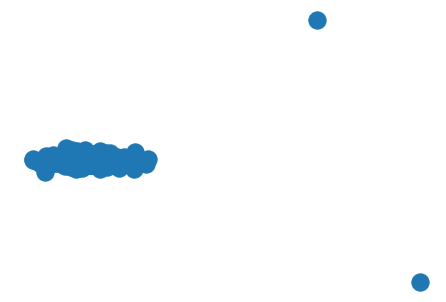

In [83]:
nx.draw(G)
plt.show()

Let's try visualize a subgraph

In [84]:
dir(G)

['__class__',
 '__contains__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_adj',
 '_node',
 'add_edge',
 'add_edges_from',
 'add_node',
 'add_nodes_from',
 'add_weighted_edges_from',
 'adj',
 'adjacency',
 'adjlist_inner_dict_factory',
 'adjlist_outer_dict_factory',
 'clear',
 'clear_edges',
 'copy',
 'degree',
 'edge_attr_dict_factory',
 'edge_subgraph',
 'edges',
 'get_edge_data',
 'graph',
 'graph_attr_dict_factory',
 'has_edge',
 'has_node',
 'is_directed',
 'is_multigraph',
 'name',
 'nbunch_iter',
 'neighbors',
 'node_attr_dict_factory',
 'node_dict_factory',
 'nodes',
 'number_of_edges',
 'number_of_nodes',
 'order',
 'remove_edg

In [139]:
subG = G.copy()

In [136]:
small_components = sorted(list(nx.connected_components(subG))[0], key=len)

In [137]:
len(small_components)

14

In [138]:
small_components

['pharmazeutische-zeitung.de',
 'investigationdiscovery.com',
 'geneticliteracyproject.org',
 'hertfordshiremercury.co.uk',
 'eastlondonadvertiser.co.uk',
 'yorkshireeveningpost.co.uk',
 'northcountrypublicradio.org',
 'alternatives-economiques.fr',
 'frasercoastchronicle.com.au',
 'buckscountycouriertimes.com',
 'manchestereveningnews.co.uk',
 'caribbeannationalweekly.com',
 'france3-regions.francetvinfo.fr',
 'richmondandtwickenhamtimes.co.uk']

In [133]:
subG.remove_nodes_from(small_components)

In [134]:
len(subG.nodes())

32

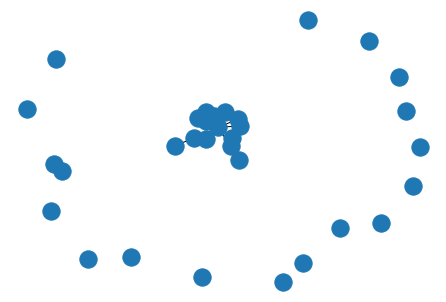

In [135]:
nx.draw(subG)
plt.show()

There are multiple algo for vis layout, so try them out & specify

Co-occurrence as edge weight

Total number of news source occurence OR # of edges as weight of nodes 

Think about capturing the information we have in our graph

Network analysis! Take some time to learn networkx

Label propagation -> node level prediction in GNN

Send out poll to Casey and Sohie (reading period?, virtual?)

For the presentation:
1. Motivation: importance of news, etc like in essay for Schiff. 
    * explain terms
    * Formulate 1-3 research qs. Main: how can we characterize the online news ecosystem? what does it mean to have audience-based approach? etc. (link to stat like hypothesis testing like comparison between local/national, reliable/unreliable sharing rate difference, position in network). 
    * Related literature review, reddit usage, etc, to position myself compared to other researchers.
2. Data collection & exploratory.
3. Methods to answer RQs
4. (anticipated) Results so far
5. Plan for Spring (per month)
6. Ask for thoughts and feasibility, narrow down? broaden? try something else